<a href="https://colab.research.google.com/github/davidromeropro/sales-predictions/blob/main/Predicciones_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO: Predicciones de ventas**
## Creado por: David Romero

* Fecha creado: 17/02/2023
* Fecha de actualización: 17/03/2023
* Descripción: Predicciones de ventas alimenticias.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
filename = r'I:\My Drive\CodingDojo\Week1\Assignments\sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿Cuántas filas y columnas?

In [ ]:
df.shape

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [ ]:
df.duplicated().sum()

0

4) Identifiquen los valores faltantes.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [ ]:
print('Valores faltantes en Item_Weight:\n', df['Item_Weight'].isna().sum())
print('Muestra de valores en Item_Weight:\n', df['Item_Weight'].value_counts().head(5))

print('Valores faltantes en Outlet_Size:\n', df['Outlet_Size'].isna().sum())
print('Muestra de valores en Outlet_Size:\n', df['Outlet_Size'].value_counts().head(5))

Valores faltantes en Item_Weight:
 1463
Muestra de valores en Item_Weight:
 12.15    86
17.60    82
13.65    77
11.80    76
15.10    68
Name: Item_Weight, dtype: int64
Valores faltantes en Outlet_Size:
 2410
Muestra de valores en Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


* No se va a eliminar los registros con valores faltantes.
* Se va a definir un valor por defecto para los valores faltantes:
	* Para Item_Weight se va a definir con -1
	* Para Outlet_Size se va a definir con undefined

In [ ]:
df['Item_Weight'].fillna(-1, inplace=True)
df['Outlet_Size'].fillna('undefined', inplace=True)

6) Confirmen que no hay valores faltantes después de abordarlos.

In [ ]:
variables = ['Item_Weight','Outlet_Size']
df[variables].isna().sum()

Item_Weight    0
Outlet_Size    0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [ ]:
# Muestra de valores de columnas categoricas.
for column in df.select_dtypes(['object']).columns:
	print(column)
	print(df[column].value_counts().head(10))
	print('*'* 100)

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
Name: Item_Identifier, dtype: int64
****************************************************************************************************
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
****************************************************************************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Name: Item_Type, dtype: int64
****************************************************************************************************
Outlet_Identifier
OUT027    935
OUT013    932
OUT04

In [ ]:
# Se estandariza valores para Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Histograma para ver las distribuciones de diversas características en el conjunto de datos.

In [ ]:
# Columnas con datos númericos 
df.describe().columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

#### Item MRP 

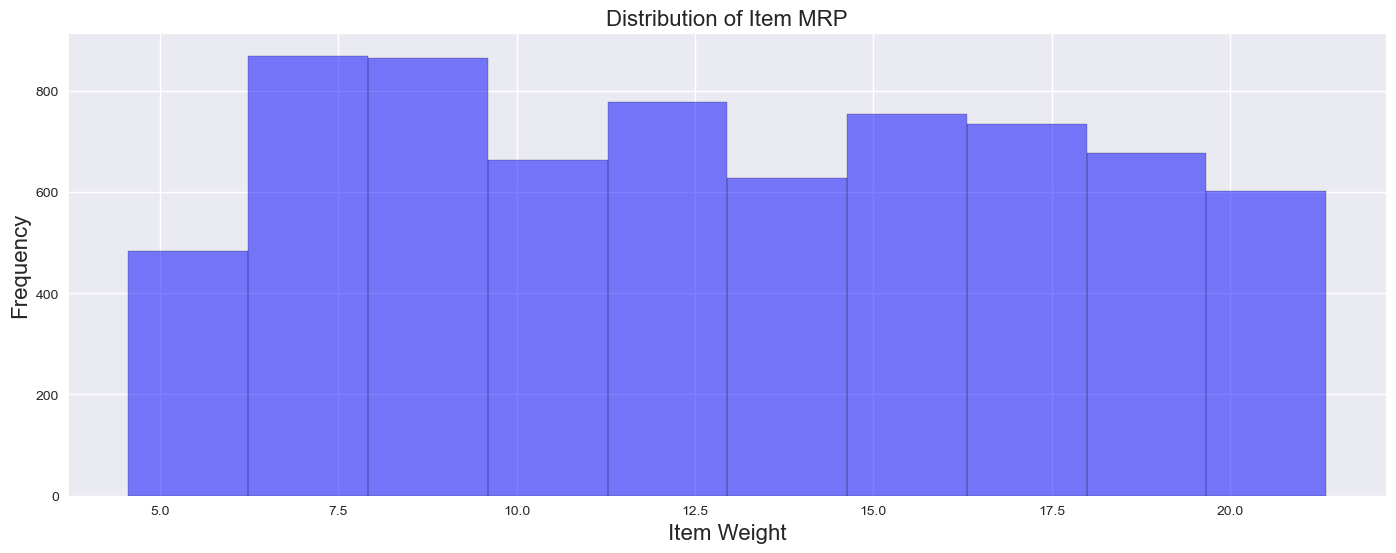

In [ ]:
# Se filtra los registros que si tienen valores en Item Weight
item_weight = df.loc[df['Item_Weight'] > 0,'Item_Weight']

plt.figure(figsize=(17,6))
plt.style.use("seaborn");
plt.hist(item_weight, alpha=.5,color='blue',edgecolor='black',bins=10);
plt.ylabel('Frequency', fontsize = 16);
plt.xlabel('Item Weight', fontsize = 16);
plt.title('Distribution of Item MRP', fontsize=16);


* El peso de los items tiene una distribución casi uniforme para los items que si tienen valores en esta característica. 

#### Item Visibility

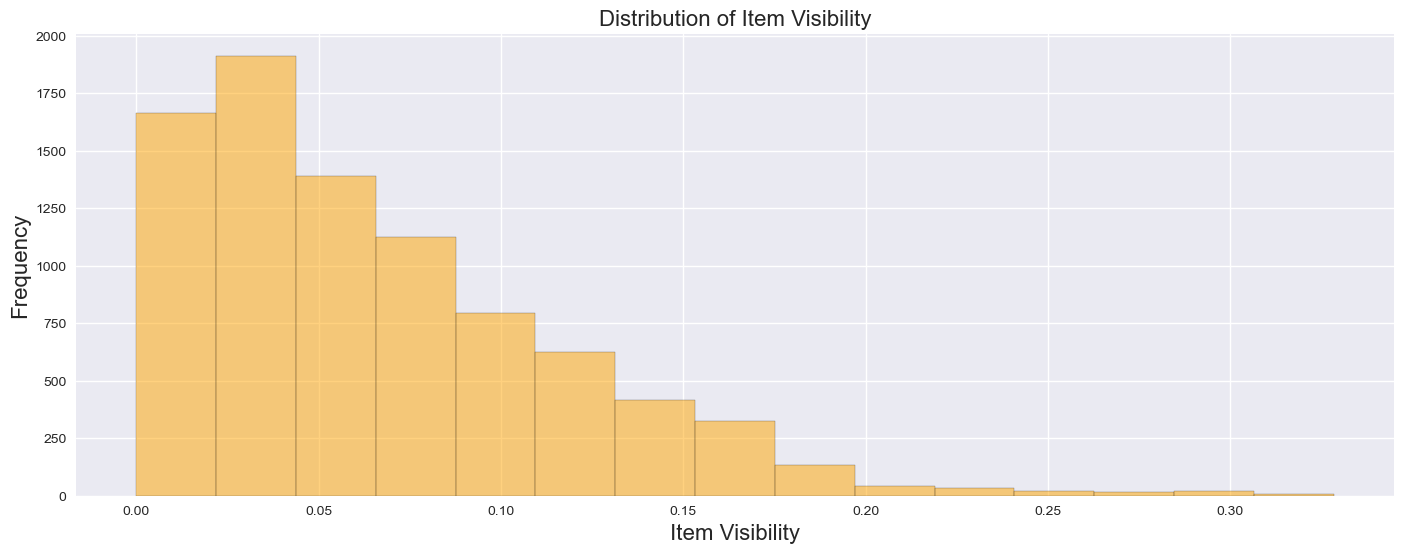

In [ ]:
plt.figure(figsize=(17,6))
plt.hist(df['Item_Visibility'], alpha=0.5,color='orange',edgecolor='black',bins=15);
plt.ylabel('Frequency',fontsize=16);
plt.xlabel('Item Visibility',fontsize=16);
plt.title('Distribution of Item Visibility', fontsize=16);

* La visibilidad de los items tiene una distribución sesgada a la derecha, es decir entre menor es la visibilidad de un item mayor es su número.  

### Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

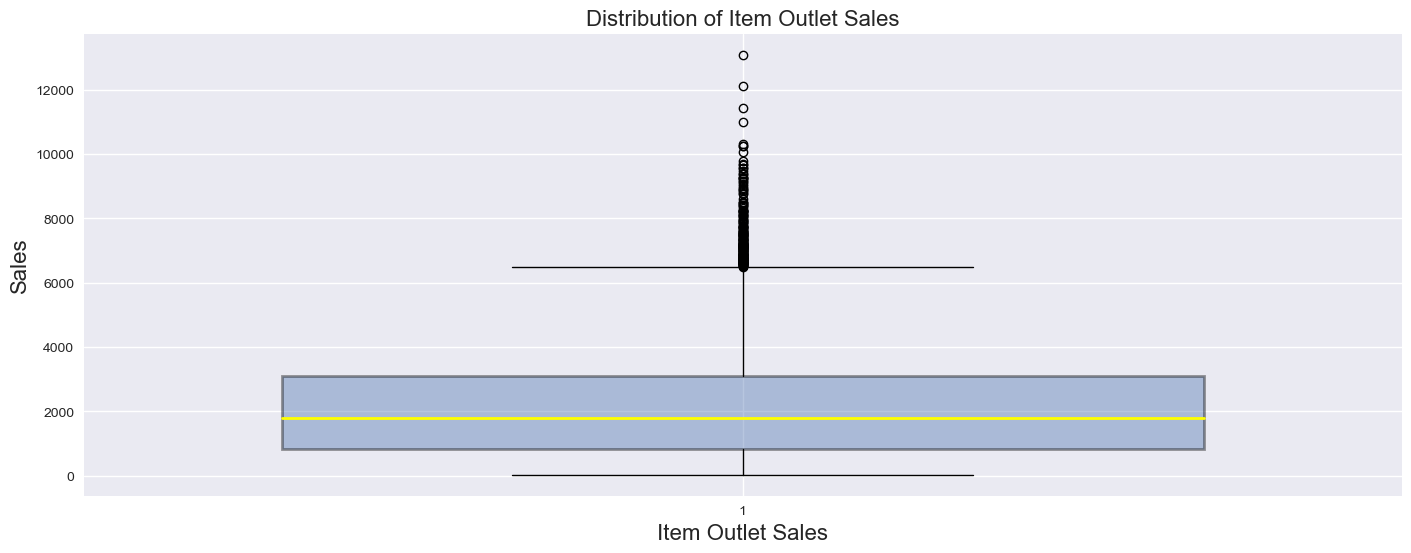

In [ ]:
plt.figure(figsize=(17,6))
item_outlet_sale = df['Item_Outlet_Sales']
boxplots = plt.boxplot([item_outlet_sale],
            widths = .7,
            patch_artist=True,
            medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
            boxprops = dict( linewidth=2, color='Black', alpha = .4));
plt.ylabel('Sales',fontsize=16);
plt.xlabel('Item Outlet Sales',fontsize=16);
plt.title('Distribution of Item Outlet Sales', fontsize=16);

In [ ]:
df['Item_Outlet_Sales'].describe().round(2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df['Item_Outlet_Sales'].median()

1794.331

* Si bien la escala para las ventas de items dificulta determinar el valor mínimo de 33.29, el valor de la mediana (color amarillo) de 1794.331, se puede observar que existen varios valores atípicos que estan fuera del patrón de distribución y que corresponden a valores altos de ventas. 

### Mapa de calor de la correlación entre las características.

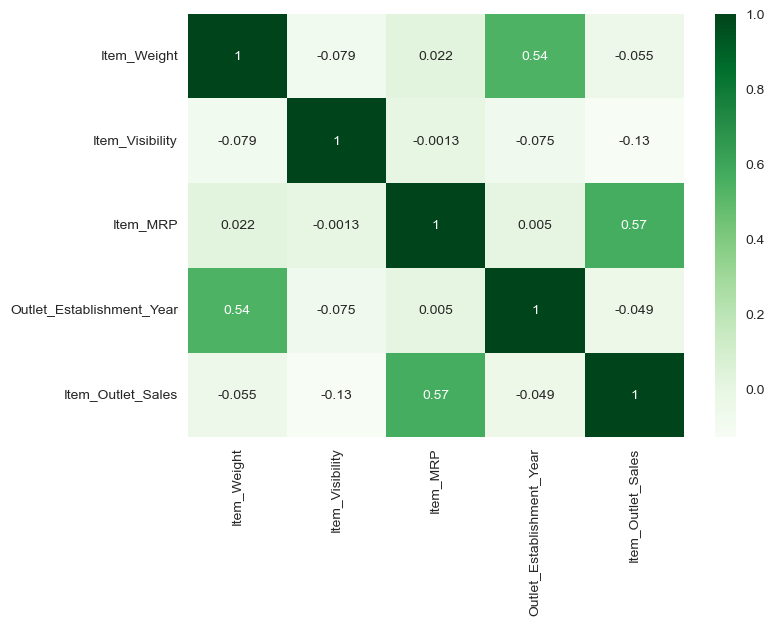

In [ ]:
corr = df[df.describe().columns].corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

Hay una correlación moderada entre el precio de venta de un item con las ventas del mismo.

* Crear un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).


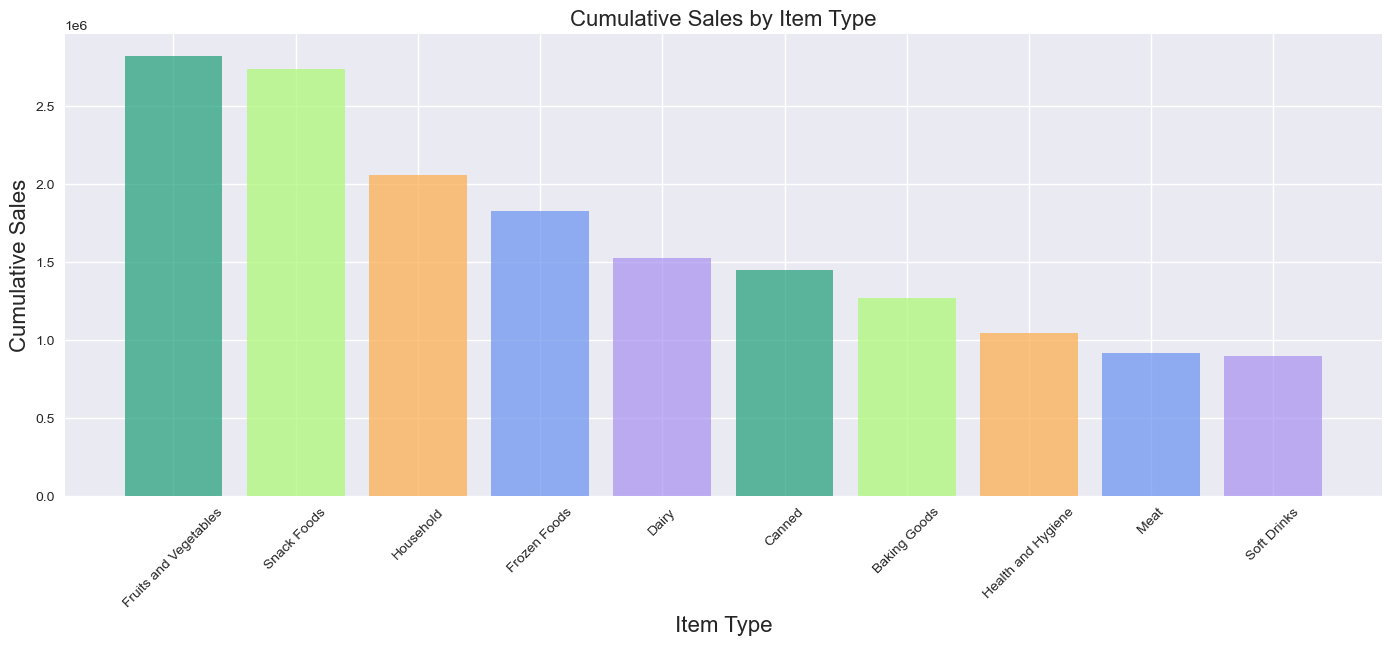

In [ ]:
plt.figure(figsize=(17,6));
items_top_sales = df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().nlargest(n=10,keep='all').reset_index()
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
plt.bar(items_top_sales['Item_Type'],items_top_sales['Item_Outlet_Sales'],alpha=.7,color=colors);
plt.ylabel('Cumulative Sales',fontsize=16);
plt.xlabel('Item Type',fontsize=16);
plt.title('Cumulative Sales by Item Type', fontsize=16);
plt.xticks(rotation=45);

* La categoría de items que mas ingresos genera son las frutas y los vegetales.

In [ ]:
max_item_visibility = df[df['Item_Type'].isin(items_top_sales['Item_Type'])].groupby(['Item_Type'])['Item_Visibility'].max().sort_values(ascending=False).reset_index()

In [ ]:
top_item_type = pd.merge(items_top_sales,max_item_visibility)
top_item_type

,Item_Type,Item_Outlet_Sales,Item_Visibility
0,Fruits and Vegetables,2.820060e+06,0.321115
1,Snack Foods,2.732786e+06,0.303743
2,Household,2.055494e+06,0.325781
3,Frozen Foods,1.825735e+06,0.294939
4,Dairy,1.522594e+06,0.304737
5,Canned,1.444151e+06,0.328391
6,Baking Goods,1.265525e+06,0.311090
7,Health and Hygiene,1.045200e+06,0.255348
8,Meat,9.175656e+05,0.287017
9,Soft Drinks,8.928977e+05,0.306543


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

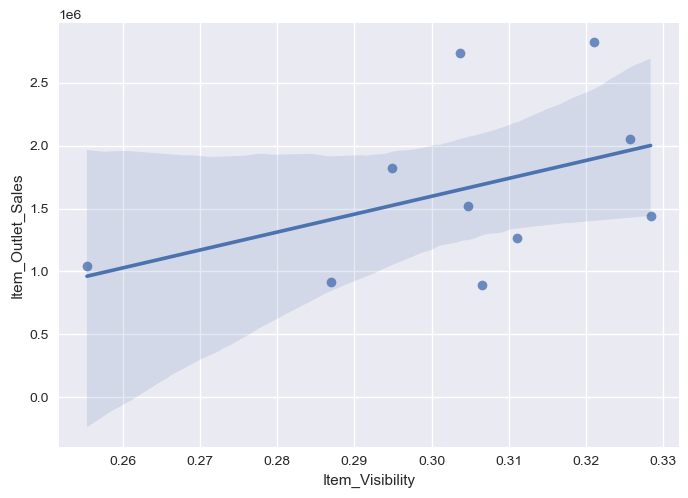

In [ ]:
sns.regplot(x=top_item_type['Item_Visibility'], y=top_item_type['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

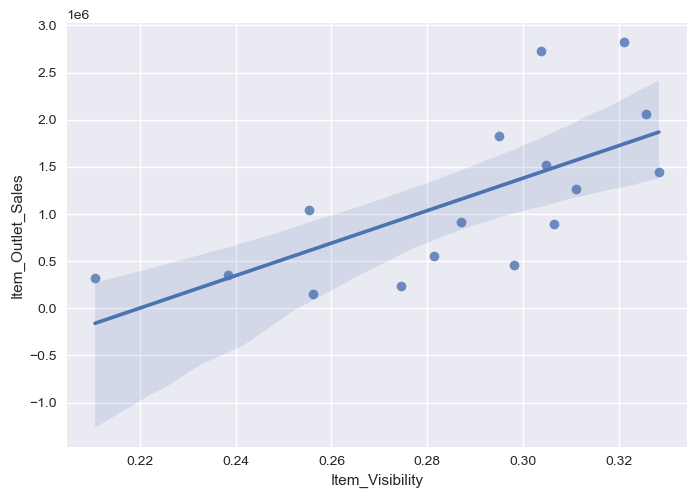

In [ ]:
cum_sales = df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().reset_index()
max_visibility = df.groupby(['Item_Type'])['Item_Visibility'].max().reset_index()
total = pd.merge(cum_sales,max_visibility)

sns.regplot(x=total['Item_Visibility'], y=total['Item_Outlet_Sales'])

In [ ]:
df.groupby(['Item_Type'])['Item_Visibility'].max().sort_values(ascending=False)

Item_Type
Canned                   0.328391
Household                0.325781
Fruits and Vegetables    0.321115
Baking Goods             0.311090
Soft Drinks              0.306543
Dairy                    0.304737
Snack Foods              0.303743
Hard Drinks              0.298205
Frozen Foods             0.294939
Meat                     0.287017
Breads                   0.281510
Breakfast                0.274592
Seafood                  0.256152
Health and Hygiene       0.255348
Starchy Foods            0.238366
Others                   0.210596
Name: Item_Visibility, dtype: float64

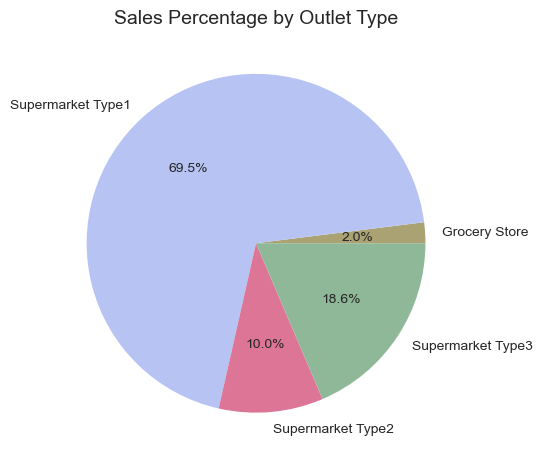

In [ ]:
outlet_sales = df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum().reset_index()
colors = ['#AAA272', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie(outlet_sales['Item_Outlet_Sales'],labels=outlet_sales['Outlet_Type'],autopct='%1.1f%%',colors=colors);
plt.title('Sales Percentage by Outlet Type', fontsize=14);
plt.xticks(rotation=45);

* El mayor porcentaje de ventas acumuladas corresponde a outlet de tipo Supermarket Type 1.

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,undefined,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Pipeline, ColumnTransformer y SimpleImputer

Regresarán al conjunto de datos original con el objetivo de evitar una fuga de datos.  

Nota: Si imputaron los valores faltantes basados en un cálculo en todo el conjunto de datos (como la media), ahora deben realizar ese paso después de hacer train test split usando SimpleImputer.  

In [ ]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
filename = r'I:\My Drive\CodingDojo\Week1\Assignments\sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Missing values
df.isna().sum().nlargest(n=3)

Outlet_Size        2410
Item_Weight        1463
Item_Identifier       0
dtype: int64

In [ ]:
# Unique values of Outlet_Size
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
percentage_missing_values_outlet_size = (100*df['Outlet_Size'].isna().sum()/df['Outlet_Size'].shape[0]).round(2)
print(f'percentage of missing values in Outlet_Size: {percentage_missing_values_outlet_size}')
percentage_missing_values_item_weight = (100*df['Item_Weight'].isna().sum()/df['Item_Weight'].shape[0]).round(2)
print(f'percentage of missing values in Item_Weight: {percentage_missing_values_item_weight}')

percentage of missing values in Outlet_Size: 28.28
percentage of missing values in Item_Weight: 17.17


In [ ]:
# Remove column name
df.drop(columns=['Item_Identifier'],inplace=True)

1. Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características.  

In [ ]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

2. Realicen un train test split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

3. Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Imputers
# cons_imputer = SimpleImputer(strategy='constant',fill_value='undefined')
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020E0317FCA0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020E0319C580>)])

In [ ]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020E0317FCA0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020E0319C580>)])

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('shape of data is', X_train_processed.shape)
X_train_processed

0 missing values in training data
0 missing values in testing data
All data in X_train_processed are float64
All data in X_test_processed are float64
shape of data is (6392, 45)


array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])